# **LSTM Exercise**

## Import libraries

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [65]:
dataset = pd.read_csv('/content/traffic.csv')

In [66]:
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'])

In [67]:
# Extract numerical features from Datetime
dataset['year'] = dataset['DateTime'].dt.year
dataset['month'] = dataset['DateTime'].dt.month
dataset['day'] = dataset['DateTime'].dt.day
dataset['hour'] = dataset['DateTime'].dt.hour
dataset['minute'] = dataset['DateTime'].dt.minute
dataset['second'] = dataset['DateTime'].dt.second

In [68]:
dataset = dataset.drop(['DateTime'], axis=1) # Drop the original datetime colmun

In [69]:
dataset.shape

(48120, 9)

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   ID        48120 non-null  int64
 3   year      48120 non-null  int32
 4   month     48120 non-null  int32
 5   day       48120 non-null  int32
 6   hour      48120 non-null  int32
 7   minute    48120 non-null  int32
 8   second    48120 non-null  int32
dtypes: int32(6), int64(3)
memory usage: 2.2 MB


In [71]:
dataset.drop(['ID'], axis=1, inplace=True)

In [72]:
dataset.info() # Check if ID Column is droped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   year      48120 non-null  int32
 3   month     48120 non-null  int32
 4   day       48120 non-null  int32
 5   hour      48120 non-null  int32
 6   minute    48120 non-null  int32
 7   second    48120 non-null  int32
dtypes: int32(6), int64(2)
memory usage: 1.8 MB


In [73]:
dataset.head()

,Junction,Vehicles,year,month,day,hour,minute,second
0,1,15,2015,11,1,0,0,0
1,1,13,2015,11,1,1,0,0
2,1,10,2015,11,1,2,0,0
3,1,7,2015,11,1,3,0,0
4,1,9,2015,11,1,4,0,0


## Normalize the dataset

In [74]:
scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(df)
dataset['Vehicles'] = scaler.fit_transform(dataset['Vehicles'].values.reshape(-1, 1))
dataset['Junction'] = scaler.fit_transform(dataset['Junction'].values.reshape(-1, 1))

## split into train and test sets

In [75]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size,:], dataset.iloc[train_size:len(dataset),:]
print(len(train), len(test))

38496 9624


## convert an array of values into a dataset matrix

In [79]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back), 0]  # Indent this line
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

## function to prepare the train and test datasets for modeling.

In [121]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [122]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainY = np.ravel(trainY)

In [123]:
trainX.shape

(38485, 1, 10)

In [124]:
testX.shape

(9613, 1, 10)

In [125]:
trainY.shape

(38485,)

## Fit the LSTM

In [126]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [127]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/50
1203/1203 - 4s - 3ms/step - loss: 8.8960e-04
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


1203/1203 - 3s - 2ms/step - loss: 2.4253e-05
Epoch 3/50
1203/1203 - 3s - 3ms/step - loss: 2.3176e-05
Epoch 4/50
1203/1203 - 4s - 3ms/step - loss: 2.1722e-05
Epoch 5/50
1203/1203 - 3s - 2ms/step - loss: 2.0186e-05
Epoch 6/50
1203/1203 - 2s - 2ms/step - loss: 1.7587e-05
Epoch 7/50
1203/1203 - 2s - 2ms/step - loss: 1.5278e-05
Epoch 8/50
1203/1203 - 3s - 2ms/step - loss: 1.4295e-05
Epoch 9/50
1203/1203 - 2s - 2ms/step - loss: 1.2817e-05
Epoch 10/50
1203/1203 - 3s - 2ms/step - loss: 1.1602e-05
Epoch 11/50
1203/1203 - 2s - 2ms/step - loss: 1.1317e-05
Epoch 12/50
1203/1203 - 2s - 2ms/step - loss: 1.0846e-05
Epoch 13/50
1203/1203 - 4s - 3ms/step - loss: 9.7542e-06
Epoch 14/50
1203/1203 - 2s - 2ms/step - loss: 9.6893e-06
Epoch 15/50
1203/1203 - 2s - 2ms/step - loss: 9.3937e-06
Epoch 16/50
1203/1203 - 2s - 2ms/step - loss: 8.9532e-06
Epoch 17/50
1203/1203 - 3s - 2ms/step - loss: 9.0260e-06
Epoch 18/50
1203/1203 - 2s - 2ms/step - loss: 8.7649e-06
Epoch 19/50
1203/1203 - 3s - 3ms/step - loss: 8.57

## Make preductuion and evaluatuin matrix.

In [128]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [129]:
trainPredict.shape

(38485, 1)

In [131]:
testPredict.shape

(9613, 1)

In [132]:
trainY.shape

(38485,)

In [133]:
testY.shape

(9613,)

In [134]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.13 RMSE


## Visualize the result

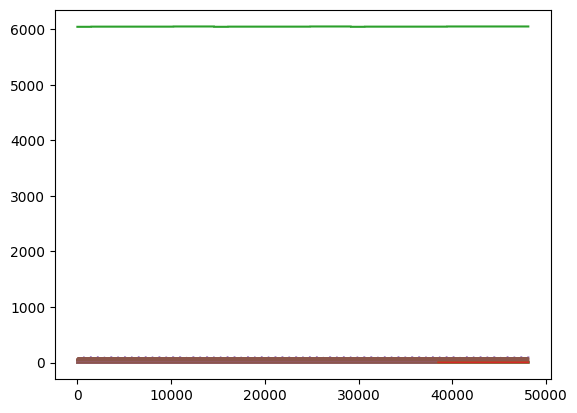

In [117]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **Well done** :)